In [3]:
%matplotlib inline

from pathlib import Path

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
DATA_DIR = Path('.', 'data', 'final', 'public')

In [3]:
train_values = pd.read_csv(DATA_DIR / 'train_values.csv', index_col='building_id')
train_labels = pd.read_csv(DATA_DIR / 'train_labels.csv', index_col='building_id')

In [4]:
train_values.dtypes

geo_level_1_id                             int64
geo_level_2_id                             int64
geo_level_3_id                             int64
count_floors_pre_eq                        int64
age                                        int64
area_percentage                            int64
height_percentage                          int64
land_surface_condition                    object
foundation_type                           object
roof_type                                 object
ground_floor_type                         object
other_floor_type                          object
position                                  object
plan_configuration                        object
has_superstructure_adobe_mud               int64
has_superstructure_mud_mortar_stone        int64
has_superstructure_stone_flag              int64
has_superstructure_cement_mortar_stone     int64
has_superstructure_mud_mortar_brick        int64
has_superstructure_cement_mortar_brick     int64
has_superstructure_t

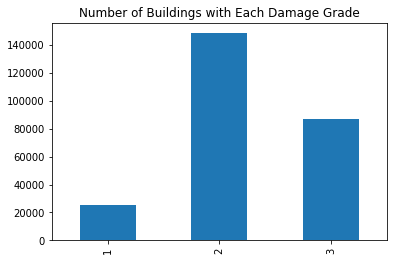

In [5]:
train_labels.damage_grade.value_counts().sort_index().plot.bar(title="Number of Buildings with Each Damage Grade")

In [6]:
selected_features = ['foundation_type', 
                     'area_percentage', 
                     'height_percentage',
                     'count_floors_pre_eq',
                     'land_surface_condition',
                     'has_superstructure_cement_mortar_stone']

train_values_subset = train_values[selected_features]

In [2]:
sns.pairplot(train_values_subset.join(train_labels), 
             hue='damage_grade')

NameError: name 'sns' is not defined

In [4]:
#sns.pairplot(train_values_subset.join(train_labels), 
#             hue='damage_grade')

In [8]:
train_values_subset = pd.get_dummies(train_values_subset)

In [9]:
# for preprocessing the data
from sklearn.preprocessing import StandardScaler

# the model
from sklearn.ensemble import RandomForestClassifier

# for combining the preprocess with model training
from sklearn.pipeline import make_pipeline

# for optimizing the hyperparameters of the pipeline
from sklearn.model_selection import GridSearchCV

In [10]:
pipe = make_pipeline(StandardScaler(), 
                     RandomForestClassifier(random_state=2018))
pipe

Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('randomforestclassifier', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min...obs=None,
            oob_score=False, random_state=2018, verbose=0,
            warm_start=False))])

In [11]:
param_grid = {'randomforestclassifier__n_estimators': [50, 100],
              'randomforestclassifier__min_samples_leaf': [1, 5]}
gs = GridSearchCV(pipe, param_grid, cv=5)

In [12]:
gs.fit(train_values_subset, train_labels.values.ravel())

c:\program files\python37\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
c:\program files\python37\lib\site-packages\sklearn\base.py:467: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
c:\program files\python37\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
c:\program files\python37\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
c:\program files\python37\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all

c:\program files\python37\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
c:\program files\python37\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
c:\program files\python37\lib\site-packages\sklearn\base.py:467: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
c:\program files\python37\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
c:\program files\python37\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype uint8, int64 were all converted

c:\program files\python37\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
c:\program files\python37\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
c:\program files\python37\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
c:\program files\python37\lib\site-packages\sklearn\base.py:467: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('randomforestclassifier', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min...obs=None,
            oob_score=False, random_state=2018, verbose=0,
            warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'randomforestclassifier__n_estimators': [50, 100], 'randomforestclassifier__min_samples_leaf': [1, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [13]:
gs.best_params_

{'randomforestclassifier__min_samples_leaf': 5,
 'randomforestclassifier__n_estimators': 100}

In [14]:
from sklearn.metrics import f1_score

in_sample_preds = gs.predict(train_values_subset)
f1_score(train_labels, in_sample_preds, average='micro')

c:\program files\python37\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


0.5894183061461775

In [15]:
test_values = pd.read_csv(DATA_DIR / 'test_values.csv', index_col='building_id')

In [16]:
test_values_subset = test_values[selected_features]
test_values_subset = pd.get_dummies(test_values_subset)

In [17]:
predictions = gs.predict(test_values_subset)

c:\program files\python37\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


In [18]:
submission_format = pd.read_csv(DATA_DIR / 'submission_format.csv', index_col='building_id')

In [19]:
my_submission = pd.DataFrame(data=predictions,
                             columns=submission_format.columns,
                             index=submission_format.index)

In [20]:
my_submission.head()

,damage_grade
building_id,
300051,3
99355,2
890251,2
745817,2
421793,2


In [21]:
my_submission.to_csv('submission.csv')

In [22]:
!type  submission.csv

building_id,damage_grade
300051,3
99355,2
890251,2
745817,2
421793,2
871976,2
691228,2
896100,3
343471,2
766647,2
800548,2
652685,2
590834,2
612530,2
535718,2
269418,2
281421,2
797571,2
216579,2
81554,2
132785,2
976125,2
851237,2
322922,2
786774,3
922680,2
134349,2
551456,2
194812,2
520031,2
765502,2
517764,2
174470,2
395012,2
159776,2
62638,2
65760,2
761527,2
37201,2
853163,2
562505,2
349010,2
780817,2
179897,2
845103,2
171560,1
586661,2
84102,2
610806,2
269531,2
3781,2
127674,2
820462,2
955190,2
405557,2
143219,2
360041,2
378036,1
613583,2
992040,3
849585,3
491236,2
847580,2
229211,2
173624,3
642562,2
86467,3
684629,2
304627,1
255913,3
861624,2
367328,2
13216,2
838446,2
981040,2
335849,2
823769,2
666855,2
398783,2
829946,2
326177,2
359387,2
924578,2
712624,2
946541,2
373943,2
865274,1
522404,2
841632,2
649142,2
332157,1
722082,1
279597,2
107512,2
26477,2
138895,2
553866,2
157718,2
582842,2
123399,2
189875,2
70843,2
225218,2
703273,2
245176,2
760257,2
641933,2
76772,2
302226,2
535232,

44286,2
139215,2
612373,2
593254,2
332216,2
927631,3
612651,2
412191,2
232483,2
619227,2
807310,2
66500,2
68419,2
771864,2
964198,2
880171,1
66333,2
365774,2
665443,2
735633,2
265814,2
658328,3
63909,2
811707,2
152440,2
1016341,2
618363,2
650308,2
457271,2
1032941,2
227805,2
479016,2
866410,2
531451,2
292337,3
1005484,2
73991,2
366821,2
908732,2
667333,2
215197,2
894897,2
459277,3
138365,2
1042378,2
390170,2
986842,2
497152,2
588246,2
313754,2
658879,2
270141,2
135167,3
801080,2
390241,2
679307,3
549638,2
653482,2
466081,2
441274,2
593654,2
171896,2
643490,2
879821,2
460259,3
859363,2
530025,2
770784,2
430211,2
90669,2
565982,2
375806,2
304069,1
136127,2
673173,2
701635,2
479984,2
180076,2
922568,2
454935,2
68771,2
946528,2
122092,2
862555,2
77489,2
893243,2
323623,3
133712,3
775022,2
558615,2
549207,2
976399,2
417058,1
512105,2
41100,2
524035,2
138158,2
637551,2
249895,2
397469,3
574600,2
25146,2
792901,2
73187,2
92057,2
722497,2
446675,2
741358,1
307823,2
564518,2
219391,2
107542,2
6

712439,3
840992,2
717299,2
711378,3
562754,2
196158,2
618526,3
658339,2
864091,3
871272,2
435857,2
386565,3
195234,2
543143,2
1048587,2
688381,1
776822,2
118130,2
316350,2
466695,2
504134,2
44797,2
634879,2
233096,2
926600,3
266428,2
492138,2
548980,2
778733,3
579033,2
349204,2
71105,2
445389,2
167595,2
732552,2
577822,2
998592,2
153648,2
97938,2
305509,2
176866,1
472668,2
37852,2
126847,2
370560,2
733939,2
579084,2
476110,2
182671,2
602044,3
256192,2
1017969,1
981611,2
985312,3
351154,2
347418,2
1000740,2
896183,2
832632,2
544879,2
145697,2
338009,2
411664,2
101578,2
161296,2
327008,2
682059,2
433328,2
753665,2
257012,2
986437,2
802908,2
674723,2
160686,2
176089,2
531448,2
342013,2
642365,2
737264,2
378552,2
221096,2
437931,2
177997,2
883703,2
749482,2
469963,2
592898,2
391521,2
622635,2
913090,2
779096,2
818505,2
730501,2
980713,2
944151,2
69572,2
890232,2
1044225,2
552285,2
109868,2
9032,2
99672,2
688524,2
1006912,2
849228,3
27168,3
472455,2
449627,2
622592,2
514633,2
596593,2
16411

525709,2
765411,1
317934,1
624196,3
41328,2
848520,2
327828,2
724563,2
991935,2
405163,2
702521,2
757013,2
247109,2
127427,2
512527,2
660,2
902403,2
217643,2
901185,3
862280,3
404240,2
42253,3
431755,1
284741,2
677581,2
993899,2
229069,2
115412,3
1047319,2
437023,2
1048112,2
204055,2
238803,2
509691,3
421857,3
468922,2
479677,2
595738,2
779286,2
352101,2
721706,3
506404,2
637305,2
995870,2
755047,2
219820,2
894747,2
219352,2
152304,2
141311,2
593095,2
424496,2
12699,1
883018,2
20282,2
197806,2
546345,3
766465,2
369793,2
569556,2
1051283,2
610214,2
776044,2
769234,1
937563,2
52494,2
282860,2
35315,2
292806,3
61999,2
1000111,2
187192,2
946509,2
477904,2
127203,2
824766,2
1050268,2
728665,2
539540,2
1011768,2
712207,2
150818,2
925598,2
468205,2
810054,2
245051,2
823833,3
494227,3
336332,2
127210,2
685956,1
35258,2
833520,2
908831,3
202483,2
56795,2
857478,2
160276,2
383833,2
639472,3
911213,2
317943,2
537780,2
505663,1
862524,2
336982,2
667550,3
700906,2
253556,2
801898,2
603236,2
314661,

572757,2
71220,2
216400,2
711200,2
516606,2
485620,2
379758,2
747938,2
423300,3
424255,2
544042,2
243094,3
340506,2
524735,2
514528,2
227510,2
146552,2
301147,2
112279,2
510790,2
776543,2
962811,2
251427,2
931931,2
1006828,2
195678,2
894480,2
674822,3
665329,2
136517,2
289007,2
317892,2
602034,3
203574,2
185043,2
392818,2
380491,2
886268,2
217985,2
575026,2
683858,2
857724,2
831500,2
603729,2
2657,2
1030251,2
1051558,3
816612,2
506649,2
651616,2
285909,2
204949,2
264230,2
24382,2
85168,2
311454,2
883819,2
388148,2
180824,2
879213,3
624877,2
709800,2
861229,2
642620,2
787610,2
86693,2
776415,2
1040579,2
872313,2
377275,3
514002,2
208829,2
529273,2
767247,2
661139,3
34731,2
572848,2
211204,2
190033,3
304740,2
935114,3
137147,2
555856,2
218315,2
538123,2
198013,2
57242,2
92186,2
559073,2
739153,2
563788,2
368036,3
451093,2
702507,2
48547,3
407225,2
890186,2
107981,2
784715,2
770766,2
352023,3
853797,2
277269,2
699782,2
709511,2
409685,2
211858,2
913786,1
304073,1
787244,2
342637,2
696470,

189413,2
571796,2
268854,2
440468,2
28686,3
415039,2
607539,2
484966,2
244005,2
248082,2
1035949,2
965084,2
558600,2
81576,2
299777,2
471300,2
1017200,2
944671,3
832130,2
439213,1
649733,2
1030088,2
223427,2
764029,2
699864,2
609127,2
299804,3
74686,2
6927,2
867177,2
1031886,2
109955,2
473599,2
297622,2
687561,2
172150,2
518047,2
180369,2
427927,2
119326,2
242302,2
947004,2
457795,2
197013,2
747298,1
907268,2
983916,2
814647,2
804373,2
993,2
26323,2
776940,3
39965,2
173313,3
150851,2
468990,2
712072,2
227468,2
720771,2
1016160,3
831133,2
418002,2
867764,2
1018653,2
816363,2
103000,2
241409,1
738799,2
498801,2
962598,3
117331,1
716778,2
421520,2
688797,3
542587,3
785306,2
305788,2
576719,2
680981,3
1020182,2
1023786,2
734306,2
291177,2
718248,2
91723,2
525344,2
362167,2
141569,2
892166,2
153211,2
561150,2
785310,1
664311,2
211419,2
55901,2
746796,2
755986,2
809127,2
419950,2
288523,2
865856,2
281602,2
55284,2
933578,2
765042,2
229203,2
836235,2
103023,2
234385,2
65315,2
812844,2
150279,

645388,2
768169,3
437086,2
623690,3
467574,2
855228,2
1037944,2
173014,2
431104,2
393627,2
793064,2
372746,2
20622,2
493137,2
902535,2
269712,2
124651,2
493445,2
506901,3
225532,2
271520,2
332175,2
113549,2
469850,2
26352,2
1044971,2
824632,2
31623,2
746475,2
828057,2
606729,2
270741,2
66250,2
712173,2
447193,1
113568,2
950116,2
397116,2
255908,2
426781,2
888728,2
668659,1
485201,2
164419,2
136532,2
78693,2
225593,3
215271,2
687077,2
363516,2
30852,2
299432,2
894364,2
952417,2
422876,2
647244,2
1020330,2
161826,2
837441,2
787102,2
270121,2
617440,2
57151,2
867798,2
646012,2
1023254,2
1040455,2
901381,2
823398,2
123166,2
193997,2
171986,2
42858,2
472695,2
1001080,2
786062,2
1044773,2
5643,2
793567,2
251576,2
1034252,2
1019091,2
603381,2
839576,2
319309,2
50206,2
408287,2
727617,2
593045,2
133108,2
936262,2
989763,2
486764,2
211016,2
772127,2
91918,2
757982,2
169854,2
400977,2
738831,2
264402,2
64088,2
1034598,2
299870,2
942456,2
264506,2
1015681,2
212967,2
368237,2
485742,2
228502,2
200

64389,2
736861,2
215532,2
992757,2
674469,2
195014,3
764046,2
79762,2
657505,2
727354,2
387035,2
1011382,2
531491,2
557824,3
260320,1
451295,2
217433,2
709502,2
1890,2
443529,3
234907,3
981105,2
687013,2
1016096,2
662398,2
373487,1
571722,2
428223,2
1015302,2
1039452,2
826447,2
62759,2
288661,2
380117,2
399441,2
784623,2
522103,2
328191,1
304031,2
389084,2
722634,2
984953,2
582655,2
1011388,2
141579,2
67903,2
422357,2
631220,2
1001890,2
331660,3
514187,3
481982,2
95679,2
138417,2
362497,2
882485,2
125092,2
494002,2
516870,2
476267,2
1027678,2
412806,2
106502,2
659993,2
1011891,2
348521,2
805513,3
794002,2
586787,2
784097,2
650592,3
906842,2
765555,3
833678,2
40735,2
992821,2
842314,3
823787,2
897455,2
153993,2
7499,2
542108,2
792177,2
267303,2
793915,2
293651,2
41413,2
486357,2
226846,2
563532,2
578777,2
381230,2
412367,2
354509,3
344738,2
962759,2
226540,2
419316,2
433598,3
516115,2
53578,2
40217,2
92174,1
569412,2
118651,2
685101,2
103625,2
320743,2
603028,2
920066,2
940011,2
1042626

458630,2
819182,2
45006,2
284668,2
908195,2
606302,2
498153,2
1026720,2
834721,3
417899,3
648033,2
956478,2
779050,2
16224,1
551559,2
825365,2
347107,2
234417,1
1006080,3
13189,2
518901,1
182047,2
614729,2
368128,2
429118,2
262242,2
295433,2
35309,2
432875,2
968799,2
874911,2
559474,2
311721,2
459392,2
589394,2
340466,2
176485,2
837970,2
854607,2
362631,2
351278,2
529300,2
684975,2
460005,2
806028,2
655750,2
239566,2
935642,2
219500,3
834208,1
380917,2
556721,2
700807,2
582134,2
289522,3
823920,2
835141,2
663074,2
571990,2
766461,2
813437,2
775996,2
262839,2
40268,2
416639,2
1015441,3
155209,1
229257,1
1036223,1
249005,2
600333,2
231754,2
445644,2
377213,3
733376,2
780355,3
480992,2
1045710,2
793223,2
327694,2
745956,2
113346,2
708364,2
327266,2
62688,2
595246,2
742545,2
896217,2
321780,2
200681,2
86122,3
522551,2
631118,2
367967,2
224775,2
354879,2
361379,2
626473,2
604350,2
805962,3
416880,2
162804,2
292973,2
862611,2
424093,3
696373,2
141264,2
821679,2
611379,2
568034,3
928434,2
683

87266,2
986805,2
726441,2
506109,2
269572,2
790954,2
749347,2
445788,2
20165,2
140337,2
983929,2
955874,3
239338,2
297396,1
367759,2
565449,2
315556,2
28530,2
72807,1
341959,2
598066,2
921279,2
407113,2
292088,2
1016688,2
236630,2
580067,1
1030556,2
463370,2
1040889,2
509274,2
512934,2
952936,2
572661,3
943674,2
1045344,2
298260,3
856742,2
433995,2
826534,2
860430,2
429725,2
846433,2
233655,1
762019,2
463754,2
914555,2
403265,2
184992,2
777315,2
174250,2
320302,2
948070,2
22808,2
479626,2
182243,2
195155,2
20400,2
878055,2
871245,2
569331,2
995923,3
534020,2
443503,2
440789,3
418005,2
33797,2
87506,3
721678,2
307701,2
510564,2
239480,2
405125,2
22218,2
902476,2
396394,1
930225,3
553481,2
653260,2
295785,2
70090,2
61598,2
1009211,2
479075,2
779485,2
681316,2
127735,2
777085,2
343344,2
410426,3
990905,3
262339,2
528617,2
206528,2
819163,2
850102,2
870356,2
27242,3
102307,2
810014,2
902187,3
217010,2
202589,3
501727,2
298990,1
185563,2
878470,2
665170,1
1021899,2
395090,2
333908,2
728751,

796102,2
615740,2
891615,2
603821,2
918993,2
33918,3
589441,2
930549,2
147294,2
658957,2
103170,2
6126,2
154484,2
1003100,2
768131,2
879976,3
166438,2
315221,2
452041,2
967923,2
867905,2
217122,2
620931,1
976203,2
937768,3
914252,2
309340,2
392058,2
103646,2
950294,2
189377,3
429991,3
859992,2
404298,3
87273,2
156664,2
642652,3
540571,2
14857,2
507218,2
682757,2
1039621,2
865936,2
62811,2
870839,1
130927,2
198503,2
658489,2
105940,2
650081,2
1000926,2
777343,2
695219,2
595029,2
462887,2
886363,2
614809,2
203771,2
573169,2
273136,2
884072,2
372238,3
798955,2
57891,2
766499,3
331216,2
571995,2
541115,2
222650,3
401530,2
849700,3
980943,2
448001,2
63264,2
666066,1
167124,2
278499,2
406217,2
1035504,2
724699,2
294438,3
581856,2
474844,2
310753,2
1020797,2
9901,3
249861,2
799871,2
980041,2
764181,3
494385,1
625900,2
257939,2
277554,2
931899,2
353212,2
492174,2
306821,2
4630,2
197561,3
863341,2
25230,2
534355,2
702066,2
550081,1
300041,2
464761,2
297414,2
453425,2
223854,1
301641,2
719453,2


664770,2
1051324,2
441401,2
308630,2
21561,2
324631,2
137718,2
875853,2
398864,2
919611,2
763961,1
972175,2
73196,2
152996,2
670328,3
710275,1
344104,2
726240,2
905257,2
75810,2
1005090,2
191506,2
798571,2
434394,2
943440,2
479397,2
112754,2
878147,3
794153,2
984913,2
1018770,2
428850,2
445783,2
520582,2
150702,2
196982,2
716268,2
493590,2
49101,2
948935,2
704314,3
51620,2
853218,2
394417,3
637279,2
1019430,2
315760,2
931202,1
96955,3
371380,2
901002,2
741581,2
35124,2
482122,2
82461,3
831383,2
13699,3
908782,2
772428,1
725567,2
938801,2
891036,2
384384,2
94318,2
795029,2
966551,2
462875,2
496670,3
717955,2
818683,2
995716,2
1048001,1
696364,2
847256,3
748709,2
780807,3
957667,2
134510,2
24191,2
879207,2
1025430,2
735866,2
931712,2
280156,3
808906,2
716877,2
666901,2
666664,2
662783,2
1002799,2
569551,2
457484,2
684983,2
275433,2
624859,2
513166,2
457940,2
723029,2
234968,3
499628,2
625424,2
356271,2
472544,2
190533,2
987057,2
776322,2
881605,2
575858,2
72747,2
553616,2
700908,2
655145

257379,2
23473,2
13701,2
755593,2
723620,3
462340,2
397607,2
1008853,2
777294,2
95678,2
319427,2
817226,2
790741,2
446719,2
775819,3
21467,2
907876,2
629502,2
283261,2
899117,2
155217,2
410750,2
567328,2
756808,2
186460,2
1041818,2
622680,2
270027,2
1047782,2
486406,2
902738,3
105696,2
197860,2
63844,2
671586,2
718765,2
690055,2
733899,2
579118,2
588551,2
817465,2
462852,2
421966,2
898441,2
481643,2
1034349,2
1027604,2
369432,2
551126,2
84563,2
652469,2
844383,2
360632,3
218807,2
305116,2
210709,2
175908,2
203359,2
785260,2
767370,1
164731,2
414089,2
482555,2
244501,3
196387,2
150072,2
154019,2
663888,2
883009,2
519685,2
330333,2
466629,2
389664,2
156855,2
86150,2
194278,2
173807,2
374201,3
125062,2
691238,2
404278,2
861928,2
998544,2
243922,2
22789,2
178013,2
129605,2
507623,2
354424,2
645960,2
305362,2
688424,2
1001001,2
380779,2
947340,2
166163,2
156337,2
421818,2
303660,2
324395,2
197105,2
619493,3
22830,2
327278,2
54802,2
837273,2
57140,2
229777,2
679648,2
510791,3
1037608,2
59821

101908,2
1008371,2
238618,1
608614,2
762484,2
1025092,2
193898,2
622947,2
467633,3
511388,2
891800,2
78881,2
217977,2
897099,2
262504,1
999063,2
144241,2
515552,2
518732,2
103317,2
714807,2
727567,2
585678,2
946937,2
316858,2
870818,2
328490,2
770996,2
739571,2
70704,2
372153,2
59931,2
694342,2
471488,2
909492,2
694537,2
519835,2
793729,2
321415,2
413168,3
829104,2
908138,2
992548,2
56910,2
455760,2
520223,2
598246,2
405547,2
555204,2
793080,2
976420,1
365986,3
676885,2
35112,2
81245,2
680015,2
379675,2
212543,2
245868,2
483058,2
979714,3
477708,2
1047205,2
200848,2
380925,2
416769,2
27617,2
552845,2
163159,2
634329,2
730525,2
114528,2
62178,2
572881,2
1027144,2
769886,2
981249,2
379558,2
321326,2
660505,2
446344,2
329408,3
881133,2
133432,2
1015182,2
463897,2
599585,1
325032,2
736354,2
131404,3
266930,2
114105,2
582165,2
207582,2
735415,2
469010,2
261818,2
511505,2
235485,2
930282,2
427529,2
39399,2
681009,1
979966,2
1034563,2
784099,3
94995,2
384411,2
445503,2
777611,2
550946,2
71621

342017,2
881028,2
45494,2
91579,2
263853,2
290045,3
111448,2
194609,2
134292,2
364206,2
72398,2
14189,2
102268,2
960646,2
941896,3
644090,2
558625,2
249442,3
283380,2
869390,2
22038,2
118778,2
122597,3
689694,2
145129,2
635001,2
497256,2
575881,2
533226,2
506387,3
569700,1
866295,2
167686,2
609364,2
134443,2
156918,2
397828,2
243105,2
822834,2
214562,2
263754,2
680430,2
861410,2
655838,2
744735,2
507856,2
613666,1
964101,2
561829,2
620207,3
90378,2
650007,2
491970,2
338252,2
815061,2
262022,2
106363,2
806860,2
142974,2
502266,2
561105,2
925128,2
470582,2
255092,2
223484,2
245690,2
935874,2
1051828,2
1007140,3
594642,2
407699,2
135978,2
610379,2
935041,2
334961,1
944313,2
252161,2
979673,2
528449,2
478181,2
123322,2
760870,3
72620,2
827312,3
405192,2
378001,2
943089,2
305915,2
821604,2
463828,3
353290,2
911309,2
562464,2
759577,2
774999,2
227902,2
22981,2
810613,2
553243,2
305430,2
564466,3
630244,2
302713,2
891976,2
296098,3
873977,2
1040716,2
857099,2
987104,2
730135,2
946521,2
222841

609243,3
256687,3
79137,2
790255,2
629393,2
442667,2
284619,2
962809,2
858243,2
832649,2
302622,2
697816,2
460945,2
771940,2
133967,1
903731,2
823533,2
529875,2
340418,3
834973,2
104292,2
487187,2
437486,3
523111,2
749169,2
784303,2
643392,2
588321,2
212537,2
417893,3
281170,2
14817,2
837417,2
1027913,2
277950,2
590902,2
721357,2
560489,3
708039,2
398162,2
932670,2
579335,2
977523,2
71379,2
987411,3
844094,2
1037122,2
948114,3
230132,2
569099,3
963855,2
1026559,2
385816,2
271590,2
893958,2
631636,2
206693,3
360830,2
373700,2
152520,2
489744,2
72761,2
1016387,2
803517,2
338066,2
232420,3
250549,2
791108,2
431750,2
725344,2
251228,2
212748,2
1010379,2
729345,1
281414,2
521585,2
723065,2
285527,3
826636,1
77725,2
812547,2
452400,2
158854,2
66443,2
941773,2
829816,2
724998,2
180869,2
240770,2
338835,2
910731,2
72945,2
205461,3
902188,3
658805,2
878110,2
17371,2
762602,2
107794,2
753883,2
941116,3
377380,2
126119,2
303700,1
594875,2
237005,3
1001169,2
210642,2
300764,2
52192,2
505624,2
9834

972592,3
229350,2
316760,2
335947,2
672058,2
971206,2
427013,2
481096,2
226638,2
433071,1
982917,2
808740,3
644695,2
943403,2
551475,2
557509,2
110255,2
67168,2
717997,2
419651,2
1016180,2
636034,2
936421,2
231139,2
971166,2
779452,2
441380,2
585955,2
796810,2
821842,2
7060,2
377429,2
786979,2
670332,2
191372,2
485463,3
247539,3
20588,1
358857,2
440115,2
277146,2
663241,2
686729,2
515844,3
569173,2
360332,1
1030663,2
326546,2
408214,2
788323,3
676386,2
515393,2
470566,2
587620,2
1046326,2
85521,1
767553,2
50270,2
844199,2
1006886,2
895214,2
184701,2
559293,2
893737,2
913473,2
906442,2
582968,2
554743,2
266407,2
164730,2
867062,2
158076,2
630197,2
434609,2
744714,2
20949,2
962116,2
241052,2
208044,2
748718,1
180142,2
489626,2
855510,2
441785,2
564853,2
930532,2
750911,2
615179,2
253063,2
215310,2
334637,1
854850,2
97630,3
962639,2
154670,2
982935,2
955196,2
321010,2
372563,2
231488,2
280329,2
994542,2
458702,2
413335,2
632433,2
997344,2
553378,2
203245,2
359702,2
314156,3
743681,2
54001

262963,2
611657,2
615196,2
724901,2
1018136,2
277259,2
125209,2
4269,2
8625,2
876506,2
246196,3
685872,2
828884,2
302529,2
794325,2
235380,2
623215,2
74241,2
676025,2
12429,3
143280,2
896766,2
21810,1
184379,2
890678,2
870732,2
876574,2
913339,2
122906,2
239670,2
302209,3
145926,2
540567,2
604675,3
941995,2
749192,2
149246,2
612226,2
156823,2
722588,2
731869,2
611520,2
465418,3
495374,2
258368,2
451378,2
30236,2
204969,2
397742,2
178447,2
735558,2
553654,2
897061,2
817400,2
960824,2
920518,2
343301,3
362007,2
389526,3
55686,2
194402,2
673767,2
984296,2
94003,2
1026632,3
895999,2
264555,2
618031,3
1036858,2
356652,2
757437,2
353858,2
807319,2
79853,2
830880,2
1003450,2
914054,2
357398,2
261821,2
257643,2
641310,2
925399,2
646865,2
351785,2
756358,2
364154,2
763239,2
405764,1
989678,2
56201,2
303296,2
795788,2
455238,2
541802,2
80480,2
906508,3
995773,2
961246,2
97624,2
784093,2
982535,3
589223,3
565778,2
295022,2
990099,2
470311,2
951690,2
790663,2
171087,2
207141,2
40611,2
100399,2
683

882139,2
942115,2
673664,2
723841,2
826940,2
25353,2
1037755,2
618930,2
897982,2
873532,2
539304,2
969227,2
276647,2
234739,2
683540,2
407882,2
122023,2
161779,2
577666,2
49528,2
427331,2
490196,2
253674,3
1048260,2
925092,2
930816,2
532028,3
534230,2
5717,2
219667,2
346478,1
51106,2
10254,3
169559,2
922837,3
601763,2
713650,1
240172,2
355743,2
446650,2
546774,2
356383,2
801522,2
416893,2
373668,2
628568,2
885317,2
716191,2
309170,2
1005801,2
898741,2
986835,2
774441,2
579155,2
31934,2
477747,2
1037435,2
245700,2
1021440,2
720207,2
877978,2
273776,2
895249,2
784765,2
1026744,2
975956,2
768175,2
1032187,2
494614,2
518443,2
795679,2
251258,2
755453,2
348502,2
216977,2
399360,3
180070,2
139791,2
325514,2
477983,2
890918,2
375124,2
435440,2
1052247,2
591460,2
224362,1
540759,2
726873,2
693944,2
148665,2
50993,2
678356,2
912253,2
438365,1
950339,2
982041,2
318620,2
481206,2
366593,2
12239,2
204719,3
1017341,2
49500,2
824764,2
750400,2
159575,2
331979,2
182649,2
1047786,2
241253,2
301513,3
4

22363,2
358124,2
532889,2
1017352,2
127566,2
54206,2
528393,2
923124,2
122881,3
819334,2
682852,2
296742,2
427532,2
320341,2
774522,2
256901,2
499202,2
417634,2
1006992,1
450744,3
587058,2
520766,2
705847,2
487476,2
138426,2
448861,2
154612,2
303251,2
674458,2
651615,2
358458,2
747291,2
99840,2
756261,1
576052,2
1000937,2
1002159,2
903921,2
860934,2
339661,2
171588,2
741488,2
1019024,2
199644,1
355627,2
997397,2
862060,2
723035,1
621260,2
411351,2
964728,2
917761,3
794832,2
375516,1
169199,2
205873,2
414133,2
365186,2
885339,1
265985,3
463183,3
457773,2
411070,2
731037,2
285271,2
97456,2
846677,2
246841,2
641174,2
341682,2
198849,1
331104,2
823671,2
841184,2
263532,1
87314,2
145526,2
413990,2
125533,3
164529,2
835031,2
342596,2
13121,2
684109,2
277531,2
439047,2
583913,2
770460,2
997388,2
554423,2
340755,2
416448,2
156530,2
805011,2
754080,2
532769,2
154985,2
838060,2
829238,2
200063,2
248215,3
44321,3
510256,2
496130,2
695289,2
234827,2
996813,2
422033,3
1013185,1
160777,2
598311,2
56

269853,2
108420,2
51547,2
322626,2
171490,2
1016400,2
977863,2
151285,2
991574,2
260718,2
275897,2
709568,3
860698,2
189316,3
978663,2
319802,3
220368,2
276841,2
343987,2
464773,2
749947,2
471374,1
369159,2
826015,2
1018459,2
339668,2
638047,2
230071,3
266554,2
71144,1
337817,2
220778,2
97625,2
122558,2
368645,2
71107,2
1050770,2
395302,3
315257,2
694314,2
278958,2
906163,3
834959,2
95583,3
27593,2
774099,2
18652,2
796711,2
777997,2
267031,2
653730,2
732937,2
1007616,2
575911,2
482962,2
661938,2
349153,2
875122,2
787922,2
754794,2
208410,2
831429,3
439259,2
700529,2
519069,2
859684,2
384468,2
573402,2
59828,2
734758,1
1030179,2
333862,3
419687,3
698453,2
698496,2
61716,2
428750,2
727955,2
847384,1
379101,3
38532,3
197247,2
124097,2
1035911,2
750639,2
708963,2
96133,2
915429,3
667724,2
16692,2
666579,2
179979,3
339562,3
278835,2
1041134,2
867066,2
282758,2
398565,2
480489,2
175607,2
160126,2
959910,2
310916,2
48065,2
621093,2
978368,3
656089,2
987628,2
186307,2
809299,2
598908,1
603683,

997984,2
257500,2
902309,2
124446,2
212555,2
62186,2
968681,3
642235,2
661655,2
382563,2
227439,2
118258,3
761351,2
621417,2
863605,2
585566,2
643856,2
882539,2
237951,2
592230,2
279895,2
52379,1
204120,2
493123,2
782024,2
995487,2
21312,2
314759,2
604780,2
973757,2
379472,2
931520,2
210645,2
1043976,2
1039840,2
213564,1
314800,3
656547,2
146270,2
387697,2
395388,2
1050936,2
952531,2
910030,2
346618,2
456218,2
726143,3
242093,2
420481,2
912199,2
775355,2
1011644,2
898677,2
192440,2
238654,2
737436,2
234620,2
985628,2
994299,2
983204,2
988480,2
439579,2
303679,2
437913,2
331008,3
577988,2
215186,2
840761,2
146642,3
174859,2
767069,2
17780,2
60754,2
462899,2
1043060,3
687568,2
287861,1
816988,2
613688,2
522135,3
347803,2
279173,2
966373,2
856967,2
83069,2
975049,2
496352,3
144575,2
384862,2
402313,2
23978,3
123683,2
737405,2
836777,2
1000409,1
280571,2
86007,2
977159,3
869579,2
407479,2
876425,2
596465,2
826816,3
460605,2
336701,2
198921,3
782217,1
164046,3
99662,2
217995,2
694080,2
1017

141010,2
1038649,2
984866,2
768411,2
543647,2
708170,2
983212,1
386767,3
251328,2
866449,2
570275,2
600978,1
597969,2
610220,2
220096,2
272769,2
553739,2
520110,3
118746,2
770366,3
1035150,2
535361,2
334716,2
532318,2
722847,2
617007,3
466767,3
218984,2
527357,2
401083,2
6353,2
518172,2
596501,3
719299,1
655481,2
774708,2
780590,3
518019,2
131279,2
423912,2
454914,3
333696,2
720236,2
199227,2
355094,3
801321,2
352487,2
883597,3
562120,2
522754,2
868965,2
409922,3
338660,2
158736,2
403173,2
159089,2
700886,2
483026,2
281546,2
30558,2
981398,2
466002,2
649068,2
804764,2
744190,2
597387,1
286371,2
202954,2
860927,2
164878,2
447363,2
526358,2
14700,2
801147,2
752672,2
822521,2
562014,3
1000268,2
487119,2
514713,2
105633,2
980838,2
441384,2
596618,2
409554,2
841433,2
135621,2
638465,2
424333,2
477770,2
69185,1
868271,3
889854,3
221140,2
137962,2
903578,2
640206,2
896831,2
249228,2
379272,3
941509,2
1020142,2
82790,2
879612,2
192062,2
103065,3
542699,2
1026451,3
644746,2
756059,2
439248,2
47

382248,2
800638,2
491487,2
534488,2
967853,2
610959,3
766760,2
818113,2
1040913,1
423492,2
865481,2
349570,2
221118,2
764706,2
884077,2
786261,2
1001967,2
323899,2
927645,2
707757,2
157537,3
144589,2
713426,2
743468,2
29463,2
202530,2
538933,2
354518,2
404128,2
82375,2
865308,2
704997,2
303606,2
304142,2
276572,2
323721,2
454811,2
395002,2
925810,2
522598,2
888479,2
41934,2
367079,2
276888,2
200318,2
1026266,2
692481,2
129378,2
48923,2
897345,2
758943,2
823662,2
148808,2
976400,2
817376,2
937382,2
1024926,2
503386,2
615033,2
143744,2
977936,2
985779,2
1050949,2
847724,1
574470,2
314403,2
157172,2
300289,2
538379,2
729109,2
281495,2
182156,2
169621,2
633741,2
655788,2
816569,2
307673,2
361509,2
1022828,3
268268,2
44198,1
37889,2
165799,2
925496,2
471249,2
248851,2
622818,3
80850,2
569554,2
142551,2
204443,3
452123,2
105382,2
552930,2
413163,3
272927,1
747274,2
64020,2
442700,2
319967,2
432658,2
337375,2
331958,2
503031,2
35773,2
222110,2
163778,2
711399,2
9696,3
904165,2
423434,2
68282,

706593,2
216974,2
435621,3
534016,2
395309,2
298066,2
952288,2
1029651,3
1017273,2
392131,2
782182,2
424063,2
836881,2
917769,2
291327,2
892972,2
118331,2
727108,1
928830,2
884943,2
296830,2
228977,2
821672,2
146770,2
128581,3
52299,2
280989,2
249974,2
729260,3
749406,2
70629,2
794715,2
116765,2
186461,2
550999,2
75682,2
1032033,2
407789,2
959173,2
39440,2
112728,2
274739,2
840990,2
374679,2
478966,3
185874,2
823118,2
976809,2
225174,3
735449,2
219887,2
574787,2
784958,2
315734,2
988373,3
805207,2
54568,2
532577,2
988394,2
79604,2
689304,2
353219,2
881129,2
482049,3
628093,2
17562,2
285407,2
218711,3
960977,3
62854,3
540294,2
693113,2
237678,2
572196,2
601439,2
839116,2
487800,2
933978,2
434838,2
915536,2
585944,2
935265,1
261174,2
990213,2
856892,2
297237,2
780648,1
3240,2
35994,2
977886,2
780076,2
785393,2
332854,3
937149,2
249598,1
29589,2
1001786,2
549995,3
254744,2
121638,2
675134,2
670862,2
192269,3
707898,2
844921,2
988264,2
945552,1
928849,2
834091,2
716236,2
73811,2
864845,2
3

417188,2
203814,2
580082,2
899481,1
161371,3
567077,2
398999,2
715122,2
619909,2
541191,2
238898,2
1019078,2
86356,2
107846,2
847776,2
380129,2
964079,2
486791,3
908127,2
502799,2
706711,2
670823,2
338642,2
106197,2
293371,2
354862,2
524147,2
540903,2
911951,2
1049902,2
532982,2
231919,1
501458,2
414388,3
748695,2
792082,2
1014885,3
861700,2
429976,2
587071,3
396748,2
675945,2
491983,2
677488,2
584485,2
628264,1
436582,2
284147,2
72800,2
125428,2
865938,2
931449,2
761885,3
333075,2
723267,2
761471,2
631246,2
315895,2
995653,2
441211,2
451155,2
814088,2
897148,2
47487,2
142700,2
922368,2
222689,2
185920,2
96974,2
152089,2
48494,2
504322,2
114484,3
255615,2
200624,2
294792,2
958598,2
1000022,2
217601,2
734511,2
227216,2
719684,2
357297,2
775310,2
61221,2
486883,2
978143,2
354063,2
961868,1
287847,2
803675,2
177088,2
344687,3
851926,2
430322,2
811550,2
516582,2
909162,2
940141,2
652910,2
430442,2
1012451,2
939146,2
179432,3
359573,2
741087,3
548584,2
874901,2
408689,2
819999,2
985028,2
39

856978,2
666025,2
33429,2
558933,2
40418,2
285861,2
668444,2
632865,2
441224,2
430739,2
371787,2
214489,2
587965,2
5941,2
707131,2
179258,1
692869,3
815502,2
503261,2
295002,2
603653,2
262618,1
865198,1
24384,2
224163,3
560551,2
166378,2
236232,2
491185,2
794884,2
603941,2
36199,2
827792,2
721881,2
712944,1
1032586,2
505739,2
623774,2
572418,2
227653,2
366718,2
842382,2
212105,2
971492,2
424615,2
1042472,2
118912,3
310764,2
325114,2
332056,2
408154,2
54468,2
963358,2
398347,2
136705,2
864221,2
568035,2
78088,2
367600,2
574109,2
365214,2
862383,2
488595,2
1051262,2
456400,2
826525,2
893106,2
221938,2
223234,1
915826,2
417320,2
590405,2
657799,2
580856,2
393842,2
663671,2
491001,2
452629,2
268387,2
353142,2
1010970,2
518100,3
888250,2
550839,2
953560,3
478795,2
870663,2
981972,2
63706,2
40047,2
377262,2
599973,2
779680,2
989328,2
165978,2
169723,2
101075,2
549100,2
84345,2
102839,3
197906,2
15056,2
24861,2
514336,2
836898,2
81093,3
49729,2
159007,2
386785,2
529878,2
35179,2
930364,1
1024

140587,2
1032185,2
898922,2
997724,1
139101,2
659377,2
921705,2
682715,2
1016615,2
305428,2
643225,3
918718,2
114982,2
190263,2
130718,2
502414,2
104707,2
5484,2
394615,2
924094,2
985330,2
1044341,2
376373,2
694948,3
851344,3
849166,2
572346,1
386138,2
79187,2
506215,2
117887,2
52642,2
1008585,2
870978,2
228532,2
371041,2
911252,1
945390,2
807153,2
529935,2
830573,2
625326,2
137206,3
30083,3
69835,2
435151,2
1029134,2
707290,2
494679,2
896740,2
995406,3
82164,2
378838,2
147651,2
938810,2
875208,3
314520,2
727319,2
267449,3
722056,2
751483,2
588398,2
851628,2
108431,2
192271,2
232696,2
645963,2
208902,2
279474,3
750362,2
330120,2
338127,2
343290,2
384621,2
505164,1
970464,2
181746,2
511340,2
70076,2
299212,2
838369,2
382218,2
1003026,2
84146,2
554352,2
431310,2
793719,2
925304,2
580516,2
878513,2
380425,2
816048,2
683034,2
717748,2
547722,2
370118,2
926651,2
52653,2
205445,2
713085,1
830433,3
263709,2
507690,2
844439,3
848336,2
491032,2
810215,2
179536,2
952744,2
745789,2
122828,2
77447

479471,2
168923,2
490108,2
716212,2
693205,2
855449,2
912229,2
903206,3
453879,2
542874,3
684305,2
12635,2
978959,2
123589,2
756524,2
495061,3
224484,2
277750,2
941504,3
994503,2
229289,2
293760,2
679382,2
620245,2
375610,2
950716,2
170212,2
350624,2
60035,2
955939,2
934693,2
793485,1
792945,1
758063,2
751044,2
770098,2
1011779,2
692538,2
333507,2
677938,2
401988,2
882834,2
795016,2
162068,2
276824,2
384706,3
143481,2
89557,2
240731,3
909763,2
905909,2
987319,2
603966,2
651075,2
312222,2
19910,2
720370,2
818453,2
379242,2
1044965,2
678018,2
876606,2
225158,2
13421,2
2127,2
881068,2
578420,3
549555,2
778987,2
597118,2
973702,1
445379,2
824363,2
347434,2
793782,2
336977,2
199599,2
971682,2
1039713,2
521617,2
2631,2
614897,2
160577,3
214183,2
118148,1
304419,2
348628,2
896670,2
646891,2
583725,2
702350,2
133792,2
408882,2
261202,2
153276,2
193163,2
772361,2
59002,2
1031268,3
756788,2
133024,2
867472,2
405651,2
46827,2
438069,2
110353,2
501967,3
880150,2
593369,2
279011,2
62221,2
993843,2


987066,2
160956,2
977592,2
286761,2
845920,2
1035223,2
41979,2
217453,3
615457,2
650360,2
716211,2
893378,2
633864,3
621854,3
444975,1
340983,2
776404,2
774684,2
69978,2
671346,2
578542,2
305555,2
532558,2
112373,2
501385,2
822030,2
917468,2
530737,2
648634,2
706449,2
64571,2
641256,2
800670,2
1031715,2
411531,3
944234,2
114586,2
779659,2
579279,2
517287,2
166633,2
387609,1
568698,2
686509,2
5000,2
97651,2
889443,3
640862,2
348799,2
491775,3
436295,3
658524,2
983893,1
766896,2
146918,2
58345,2
24909,2
63169,2
161526,2
426035,3
543056,2
765228,2
432816,2
542252,2
114023,2
633718,2
330627,2
29076,2
964497,2
619582,2
600713,2
755564,2
565240,2
210551,2
968374,2
193965,2
931010,2
336953,2
906843,2
84587,2
2265,2
463785,2
1012087,2
720381,2
658638,2
630848,2
642713,3
539441,2
863866,2
1002608,2
640366,2
1179,3
1038469,2
954294,2
98445,2
1021842,2
172798,2
779895,2
820605,2
1017112,2
290300,2
740331,2
353998,2
294604,1
776542,2
34433,2
1018848,2
186545,2
756761,1
673100,2
911912,2
311000,1
3

443035,2
157080,3
598667,2
813391,2
499390,2
37578,2
403285,3
963300,2
274218,2
60494,1
280881,2
995470,2
34858,2
683860,2
310457,2
679138,2
233770,2
672718,1
1026358,2
551072,2
854820,1
839670,2
786935,2
109680,2
823264,2
15607,2
464539,2
58845,2
319128,2
571190,2
3359,1
36736,2
567224,2
117099,2
448689,2
142753,2
925079,2
769566,3
159522,2
729383,2
635206,2
1042043,1
249452,2
968636,2
187015,2
832017,2
63827,2
239221,2
303437,2
497224,3
796673,3
100641,2
308413,1
898693,2
957304,2
187137,2
322744,2
132028,2
968389,2
315852,2
307036,2
950570,3
58372,2
1051868,2
107398,2
435594,3
64764,3
46418,2
701563,2
727442,2
341852,2
179891,1
939502,1
530895,2
415560,2
122840,2
121717,2
235091,2
895696,2
135139,1
763944,3
1051644,1
155833,1
687080,2
369405,2
881753,2
393161,2
127035,2
181261,2
316966,2
93191,2
162531,2
920708,2
276971,2
540664,2
758105,2
123400,2
365028,2
1015499,2
454034,2
382949,2
693776,2
171331,2
982372,2
531880,1
592159,2
25931,2
741106,2
573546,1
702724,2
916982,2
303702,2
7

616799,2
956768,2
65358,2
248070,2
252229,2
793795,2
682347,2
309339,2
1030918,2
613238,2
477062,2
605783,2
960255,1
859152,2
201597,2
76582,2
622361,2
857788,2
799923,2
535375,2
852831,2
108404,2
1026309,2
538744,2
509028,2
612979,2
583342,2
1013504,2
25825,2
1043343,3
153151,3
1038277,2
628996,2
191314,2
233911,2
723197,2
367209,2
481496,2
92626,2
360556,2
372022,2
448198,2
1050994,3
845408,2
49519,2
467886,2
323598,2
832537,2
706802,2
325664,2
908064,2
335879,2
198486,2
761632,3
203046,1
624973,2
816083,2
40197,2
354916,2
939921,2
919353,3
163446,1
1029894,1
989935,2
68686,2
639023,2
924515,2
152725,1
382256,2
313429,2
254250,2
222264,2
985232,2
45111,2
1031939,2
223375,2
204898,2
546527,3
527418,2
116751,2
203607,2
999116,2
18153,2
489280,2
932053,3
699998,2
476064,2
766593,2
849383,3
110440,2
184169,2
614942,2
749992,2
669739,2
192519,2
397023,2
615614,2
884391,2
883679,2
952410,2
435209,2
782972,2
301250,2
451260,2
63055,2
649441,2
235617,2
396925,2
266979,2
444604,2
103577,2
128

202922,1
607309,3
891849,2
575008,2
197707,2
257430,2
65507,2
615754,3
917223,2
382457,2
352873,2
197919,2
506431,2
90070,2
709094,2
1044387,2
393524,2
729644,2
341660,2
892640,3
509054,2
742548,3
884451,1
467048,3
1051511,2
476219,2
743210,3
232701,2
602369,2
109896,2
401117,2
557815,2
366468,2
1014403,2
1040221,2
881980,2
47191,2
185662,2
6476,2
148893,2
773954,2
708339,2
146905,2
245356,2
671373,2
654888,2
464205,2
576691,2
480647,2
370009,2
203189,3
96037,2
844010,2
191979,2
9887,2
718352,2
931141,2
774367,2
48900,2
427959,2
331065,2
672133,2
475254,1
490385,2
874038,2
228645,2
357825,2
215176,2
763206,2
385787,2
851214,2
855500,2
900774,2
1037063,3
285806,3
879201,2
153630,2
804891,2
490587,2
682159,2
390175,2
920332,2
722325,2
822688,2
755147,2
107273,2
726679,2
999228,3
908360,2
832832,2
528495,2
1046222,2
582235,2
587278,2
685840,1
338186,2
625971,2
256552,2
129391,2
560951,2
545108,2
692646,2
20919,2
512211,1
320120,2
456111,2
106597,2
388807,2
181248,2
621146,2
536230,1
25572

19379,2
542004,2
571877,2
1008452,3
372775,2
465860,2
525013,2
947772,2
701119,2
911107,2
567535,3
244439,2
110290,3
762592,2
664024,2
879592,2
338250,2
101158,2
814348,2
682419,2
680260,2
317396,3
609686,2
922110,2
434848,2
898298,2
69833,2
659193,2
1037196,2
795792,2
496104,3
422515,2
101238,2
490979,2
652283,2
652985,2
367262,2
206462,3
22491,2
952898,2
283407,2
1007675,2
352431,2
497693,2
1038925,2
450657,2
169041,1
838688,2
434122,2
449991,2
502248,2
932190,2
321333,2
470061,2
649814,2
183627,2
667361,2
33896,2
91912,2
448749,2
862293,2
691548,2
1043359,3
569248,2
681641,2
184666,3
638184,2
712459,2
644938,3
339397,2
189177,2
145859,2
417578,2
789283,1
896793,2
205915,2
836652,2
531228,2
889488,1
473432,2
215540,2
178072,2
593483,2
230100,2
93286,2
529631,2
986814,3
389647,2
24753,2
1036081,1
188767,2
134459,2
502155,2
986848,2
629606,2
523368,2
1012532,2
576222,2
271002,2
943646,2
22634,2
169263,2
870278,2
322382,3
928034,3
561761,3
916232,2
396350,2
971171,2
132730,3
182636,2
99

540313,2
143090,2
480442,2
166157,2
411327,2
914878,2
225107,2
615173,3
599449,2
976086,2
37400,2
740653,3
446575,2
19193,2
377201,2
670983,3
241824,2
347159,2
823081,2
913769,2
451460,2
442963,2
436931,1
829811,2
306424,2
398795,2
401698,3
1049242,2
580620,2
999510,2
60927,2
49347,2
674302,2
612398,2
117544,2
204989,2
565305,3
709393,2
305953,2
1029047,2
840347,2
89738,2
940319,2
857206,2
517117,2
225418,2
67668,2
298318,2
573877,3
724165,1
943521,2
115011,3
295449,2
715115,2
726188,2
872826,2
389216,2
489415,2
515181,2
1013460,2
509921,2
906905,2
279575,2
481965,2
866662,2
63695,2
895508,2
4974,2
344531,2
693135,2
246564,3
890117,2
721150,2
78150,2
420552,2
496015,2
505977,2
628722,2
417150,2
267597,2
190296,3
865971,3
280790,2
1044975,1
853058,1
1011530,1
744820,2
144850,2
413819,2
807907,2
358003,2
741989,2
598060,2
518646,2
648251,2
755623,1
784026,2
235517,2
663568,2
649382,2
405161,2
793366,2
238679,2
400287,2
427770,2
584439,2
330592,2
854738,2
311610,2
153308,2
780652,2
342819

577701,2
161553,2
859778,2
790443,2
337128,2
849575,2
861094,2
456092,1
815962,2
139982,2
425988,2
578693,2
905164,2
1014938,2
299224,2
190659,2
451521,2
203300,2
635732,3
716996,2
621704,2
730445,2
952051,2
646688,2
1044839,2
362554,2
1028051,2
427977,2
824803,2
558128,2
889907,2
340371,2
81224,2
794334,2
481909,2
742728,2
378149,3
696611,2
654092,2
90582,2
126335,2
353453,2
267592,2
725111,2
448137,2
961168,2
856880,2
117597,3
613305,2
123992,1
373852,2
46937,1
995945,2
25253,1
624212,2
646282,2
332598,2
524445,3
890602,2
274643,2
358211,2
91727,2
285531,2
259240,2
731427,2
194539,2
1032346,2
637017,2
732786,2
673537,2
209069,2
872717,2
237859,1
694954,3
403623,2
356423,2
713728,2
789607,2
138971,2
421223,2
730358,2
911022,2
603899,2
607159,2
729779,2
479185,3
55694,2
496963,2
391836,2
164766,1
7755,2
969940,2
58477,2
923975,2
357603,2
598963,2
667473,2
106629,2
499333,2
260066,2
581589,2
659605,2
59692,2
889309,2
685438,2
72031,2
118528,2
697579,2
391615,2
38550,3
1012763,2
927306,2

709700,2
349001,3
39995,2
228004,2
71383,2
596699,3
907499,2
790955,2
269604,2
538540,2
142873,3
769274,2
945982,2
1049633,1
292639,2
657233,2
769621,2
217159,2
552922,2
376668,2
416075,1
581323,2
643708,2
679670,3
17452,2
496683,2
987957,2
515332,1
921587,2
458048,2
495203,2
543411,2
378064,2
17444,2
867266,1
649867,2
739219,2
816786,2
324682,2
302865,2
70321,2
179590,2
216111,2
688516,2
199385,2
51637,2
629234,2
847861,2
597068,2
71631,3
201116,2
546373,2
881876,2
638692,2
37814,2
952073,2
463508,2
877636,2
153599,1
503702,2
568004,2
494738,2
450350,2
481518,2
678480,2
381055,2
764465,2
665335,2
958310,2
913662,2
356391,2
14539,2
1045092,2
1037253,2
486978,2
649317,2
937326,2
133910,2
556933,2
795761,2
291973,2
338419,2
628437,2
297789,2
787540,2
1028474,2
872390,2
742026,1
619017,2
520754,2
724545,2
252376,3
378693,2
14238,3
169325,2
23029,2
236657,2
912720,3
367540,2
722725,2
324495,2
479326,2
157123,2
616987,2
302897,2
254294,2
674052,2
823451,2
582652,2
1049498,2
892555,2
345853,

482740,2
587575,2
634649,2
702081,1
720220,2
868269,2
948351,2
652513,2
14663,2
667306,2
849659,2
93516,2
644701,2
786317,3
87402,2
652551,2
543496,2
782352,2
575889,2
870629,2
537643,2
330200,2
147135,2
755185,2
931259,2
20465,2
274541,2
760237,2
388208,2
941365,3
932028,2
723715,3
259455,2
633497,2
12619,2
373911,2
589572,2
725724,2
948003,2
601186,2
54860,2
609623,2
1008609,1
89500,2
1035769,2
1042570,2
598845,3
977498,2
552411,2
402873,2
797631,2
864135,2
486005,2
130029,2
986889,2
194952,2
561791,2
584167,2
847319,2
121607,2
357463,2
1019876,2
1038578,2
162774,2
1044537,2
416290,2
356906,2
199882,2
980256,1
809729,2
400420,2
853292,2
69713,2
859375,2
239599,2
797824,2
507314,2
526837,2
206221,3
895037,1
393929,2
635578,2
564837,2
755942,2
425283,2
60484,2
810667,2
126472,2
824287,2
860415,3
807451,2
962999,1
344284,2
127375,2
211226,2
918641,2
968884,3
602812,2
875023,2
793361,2
762451,2
625582,2
48046,2
897501,2
871948,2
796276,2
150347,2
677987,2
122011,2
875089,2
339426,2
49668

630014,2
1033234,2
457614,2
450679,2
480029,2
143057,2
146064,2
1031034,2
113883,2
1021477,2
276620,2
929543,2
692796,2
940329,3
705963,2
553012,2
577861,2
624789,2
449495,2
782232,2
1017164,2
531730,2
467830,2
251870,2
875343,2
597337,2
82008,3
777051,2
529050,2
533152,2
369191,3
302189,2
547879,2
660633,2
765963,2
806051,2
436144,2
372950,2
275719,2
252798,2
83691,1
492706,1
666845,2
544858,3
937431,3
228031,2
522760,2
799723,2
653655,2
401472,1
975417,2
309797,2
598767,2
583227,2
156647,2
753346,2
112919,2
687243,2
395592,2
756944,2
167834,2
794149,2
264523,2
22002,2
195421,2
709668,2
650683,2
883858,2
520922,3
1035477,2
904964,1
537070,2
504915,1
371372,2
372428,3
671156,2
334160,2
398596,2
605591,2
722092,3
849987,2
100408,2
646692,2
651312,2
67929,2
645155,2
534233,2
190268,2
447450,2
174205,2
49719,2
381549,2
341596,2
263426,3
688796,2
377937,2
335641,3
644581,2
177805,2
647280,2
785278,2
533348,2
754014,2
217746,2
804154,2
540240,2
435141,2
1012038,2
203813,2
108241,2
355508,2


314258,2
112459,2
384176,2
63541,2
212336,2
833669,2
213724,2
151400,2
1045059,2
244008,2
296914,1
516672,2
156249,2
764697,2
482039,2
319678,2
244847,1
151848,2
129445,3
894175,2
958787,2
1010688,2
198603,2
918803,2
287300,2
149488,3
669304,3
44213,2
41072,2
850433,3
1052330,2
604400,2
63063,2
490200,3
919412,2
624726,3
425791,2
912065,2
726513,2
532956,2
537258,2
533233,2
348082,2
917598,2
609899,2
663361,2
585725,2
711741,2
516359,2
717727,2
397386,2
771478,2
755675,2
508062,2
908120,2
67421,2
1048906,2
691298,2
821607,2
462671,2
464896,3
440068,2
136260,2
544613,1
808726,2
937885,2
905264,2
94968,2
100669,2
962504,2
422788,2
695570,2
868471,2
346891,2
529755,2
445601,2
1043216,3
969690,2
1020383,2
932204,2
220987,2
149471,2
338498,2
81259,2
555198,1
316124,2
362445,2
596459,2
630320,2
749483,2
538921,2
573202,2
970002,2
926270,2
212936,2
434519,2
496662,2
743430,2
984331,2
1022060,2
698573,3
22342,2
675916,2
16373,3
200248,2
679706,2
625488,2
234488,2
501219,1
854355,2
102876,2
174

486417,2
318847,2
635211,2
311510,2
527662,2
954879,2
348665,2
141454,2
176306,2
948978,2
328678,2
867382,2
959332,2
693145,2
915665,2
176767,2
292222,2
453547,2
916593,3
456725,2
763296,2
233701,2
97990,2
272448,2
745501,2
989374,2
398165,2
777409,2
860189,2
112830,2
16503,2
17773,3
394976,2
130192,3
499448,2
1046148,2
20774,2
610188,2
186031,2
116295,2
18021,2
1031100,2
626477,2
124538,2
989961,2
967922,3
1040935,2
304758,2
191789,2
918145,2
599638,2
686203,2
483872,2
789548,2
649526,2
1015303,2
338224,2
612677,2
590860,2
628085,2
21455,2
599318,2
420068,2
633603,2
419681,2
577033,2
844934,2
109883,2
756132,2
630391,1
445335,2
846722,2
71760,2
802606,2
16909,2
180160,1
135097,2
827610,2
237391,2
704074,2
557793,2
751976,1
125557,2
195620,1
962482,2
946302,2
196141,2
495929,1
451859,2
1043750,2
103342,2
304768,2
892354,2
980958,3
1033615,3
334466,2
690851,2
467024,2
403869,2
459913,2
795780,2
18619,3
150886,2
67551,2
855233,2
716029,2
331656,2
659588,2
842388,2
252638,2
398208,2
40425

927992,2
131188,2
709096,2
788658,2
282508,2
956749,2
346410,2
320714,2
779173,2
961852,2
202182,2
271214,3
787000,2
969037,2
989768,2
661567,2
495520,2
295298,2
236227,2
21048,2
1008132,2
60706,2
596090,2
98354,2
52212,2
701942,2
31018,2
526722,2
632970,2
149743,2
565078,3
1039023,2
551798,2
926457,2
1010866,2
436066,3
703156,3
891243,2
518397,2
810233,2
335752,2
497072,3
521839,2
492563,2
758653,2
649043,2
270177,2
1035166,2
570851,2
828834,2
426709,2
74415,2
874898,3
1028272,2
342484,2
552080,2
614085,1
396270,2
320620,3
718274,2
845904,3
817736,2
374536,2
994198,2
217558,2
460702,2
408276,2
610911,2
422840,2
919969,2
822395,3
867193,2
351712,3
870626,2
707635,2
264771,2
746348,2
1014183,3
349806,2
59109,2
939967,2
31402,2
360680,3
177451,2
746505,2
59338,2
245739,2
686526,2
145576,2
74906,2
214197,2
672316,2
17910,2
756306,2
528350,2
949660,2
201792,2
331068,2
264957,2
343498,2
968568,3
403968,2
194497,2
641435,2
195992,2
64742,2
584827,2
708205,2
737777,2
234726,2
920713,2
6016,2


272954,2
1014079,2
713537,3
67217,2
712328,2
208341,2
9777,2
995904,2
446605,2
202360,2
1039392,2
684400,2
133140,2
124654,2
204930,2
602756,2
886249,2
231828,2
383632,2
302352,3
165508,2
409730,2
884521,2
380003,2
258969,2
515466,2
526789,2
476244,2
516154,2
873055,2
767853,2
949297,2
69312,2
677037,2
653416,2
610674,2
821638,2
338316,2
316520,2
117838,2
988132,2
508483,2
788846,2
908003,2
895087,1
580664,2
283962,2
864081,2
695231,2
956123,2
299219,2
938774,2
476931,2
183681,2
657973,2
692973,2
792808,2
580891,2
521474,2
1032102,1
93797,2
785305,2
937773,2
651477,2
962406,2
302437,2
695959,2
185024,2
677792,2
995263,2
652506,3
89408,2
217784,3
849095,3
657756,2
383329,2
889126,2
105394,2
1017108,2
199110,2
953299,2
806140,2
155471,2
442776,2
9162,2
929358,2
897919,2
217673,1
773864,2
962883,2
377192,2
909227,2
241205,2
991318,2
519010,3
880871,2
735228,2
218031,2
1025200,2
465464,2
542141,2
56364,2
800481,2
572121,2
750058,2
110568,2
328876,2
372136,2
1005003,3
432507,3
672778,2
2361

127711,2
316721,2
866827,1
914303,2
231795,2
361340,2
173415,2
737609,2
364355,2
260179,2
1024885,2
702455,2
245699,2
563994,2
892391,3
689608,2
910220,2
808132,2
136497,2
695287,2
384785,2
888558,2
521792,2
973089,2
875416,2
263697,2
402144,2
387452,2
86703,2
831457,2
810926,2
407385,3
934310,2
204415,2
889957,2
449067,2
447825,2
360464,2
594020,3
957261,2
982327,2
669272,2
441549,2
478869,2
116935,2
888896,2
238909,2
643254,2
182026,3
848414,2
175638,3
42672,2
792385,2
817117,2
850307,2
342148,2
459036,3
212666,2
465497,2
284937,2
550441,2
568233,2
329674,2
500675,2
593136,2
700831,3
904311,2
333705,3
141522,2
550308,2
135054,2
147642,2
10747,2
755753,2
751109,2
553868,2
684610,2
355471,2
916718,2
580051,2
283345,2
538259,2
106928,2
911029,3
237180,2
606844,2
1042965,2
1008471,2
940415,2
296662,2
508060,2
215282,2
871912,2
800325,1
13789,2
1048396,3
213993,2
804098,2
503877,2
149292,2
461846,2
786836,2
852795,3
18355,2
345113,2
189912,2
17423,2
741,2
991186,2
492395,2
378200,2
77465,

233574,2
936236,2
448469,2
1012135,2
512223,2
64254,2
366199,3
831661,2
18716,2
254182,2
156309,2
563294,2
49866,2
964567,2
893590,2
622429,2
775659,2
315877,2
694402,2
880670,2
992421,2
702477,2
997953,2
699015,2
636545,2
81068,2
765773,2
335808,2
671069,2
271081,1
488794,2
340233,2
917694,2
845243,3
722182,2
1038543,2
55727,2
567832,2
656672,2
514928,3
664001,2
409048,2
4147,2
171519,2
75683,2
141728,2
958276,2
200763,2
578265,2
872295,2
955816,2
985390,2
938845,2
920106,2
10276,3
741302,2
809856,2
812890,2
197498,2
769556,2
584067,2
535726,3
556148,2
767723,2
479491,3
623212,2
802585,2
653157,2
63294,3
267702,3
187587,3
881327,2
383232,2
670224,2
875698,2
140827,2
763758,2
619381,2
639280,2
1019232,1
961530,2
584244,1
302428,2
172985,2
638370,2
976220,2
967203,2
76502,2
593078,3
362509,2
381608,2
769218,2
143830,2
586935,2
27920,2
573693,2
543402,2
686604,2
124008,2
436166,2
562078,2
713797,2
389455,1
1021737,2
412898,2
307814,2
713521,1
261488,2
760155,2
133356,2
113418,1
591226,2
